In [1]:
# General exploration of VOLCAT retrievals for Bezymianny eruption in October 2020.

In [2]:
%load_ext autoreload

In [3]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
from monetio.models import hysplit
from utilvolc import volcMER
from utilvolc import volcat

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [5]:
d1 = datetime.datetime(2020,10,21,14,1)
d1.strftime("%Y%m%dT%H")

'20201021T14'

In [6]:
%autoreload
# CODE to write parallax corrected files.
tdir = '/pub/ECMWF/JPSS/VOLCAT/Nishinoshima/Ash/'
vidA = 'v284096'
wdir =  '/pub/ECMWF/JPSS/VOLCAT/Nishi/Ash/pc_corrected/'
d1 = datetime.datetime(2020,7,31,20,0)
d2 = datetime.datetime(2020,8,1,20,0)
# this gets the original array.
#pdas = volcat.get_volcat_list(tdir,daterange=[d1,d2],vid=vidA,correct_parallax=False,mask_and_scale=False,verbose=True)
#volcat.write_parallax_corrected_files(tdir,wdir,vid=vidA,verbose=True,daterange=None)

In [7]:
%autoreload
tdir = '/pub/ECMWF/JPSS/VOLCAT/Nishinoshima/Ash/'
#vidA = None
#odas = volcat.find_volcat(tdir,daterange=None,vid=vidA,return_val=2)
#%autoreload
pdir = '/pub/ECMWF/JPSS/VOLCAT/Nishi/Ash/pc_corrected/'
#vidA = None
#pdas = volcat.find_volcat(tdir,daterange=None,vid=vidA,return_val=2)

In [8]:
print(pdir)
pdas = volcat.find_volcat(pdir,daterange=None,vid=None,return_val=3)

/pub/ECMWF/JPSS/VOLCAT/Nishi/Ash/pc_corrected/


In [9]:
pdas

['VOLCAT_HIMAWARI-8_JP_s2020218_235500_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_173000_g001_pc.nc',
 'VOLCAT_HIMAWARI-8_JP_s2020218_235000_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_173000_g001_pc.nc',
 'VOLCAT_HIMAWARI-8_JP_s2020218_234500_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_173000_g001_pc.nc',
 'VOLCAT_HIMAWARI-8_JP_s2020218_234000_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_173000_g001_pc.nc',
 'VOLCAT_HIMAWARI-8_JP_s2020218_233500_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_173000_g001_pc.nc',
 'VOLCAT_HIMAWARI-8_JP_s2020218_233000_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_173000_g001_pc.nc',
 'VOLCAT_HIMAWARI-8_JP_s2020218_232500_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_173000_g001_pc.nc',
 'VOLCAT_HIMAWARI-8_JP_s2020218_232000_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_173000_g001_pc.nc',
 'VOLCAT_HIMAWARI-8_JP_s2020218_231500_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_173000_g001_pc.nc',
 'VOLCAT_HIMAWARI-8_JP_s2020218_231000_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_

In [59]:
%autoreload
df = volcat.get_volcat_name_df(tdir)
dfpc = volcat.get_volcat_name_df(pdir)

In [21]:
# This is for writing the parallax corrected files.
%autoreload
fname = df['filename']
fnamepc = dfpc['filename']
fname_m = [x.replace('_pc','') for x in fnamepc]
fnot = [x for x in fname if x not in fname_m]
print(len(fnot), len(fname), len(fnamepc))
print(1947+225)
#volcat.write_parallax_corrected_files(tdir,wdir,vid=vidA,flist=fnot,verbose=True,daterange=None)

0 2172 2172
2172


In [60]:
print(df.columns)
for col in df.columns:
    print(col,'----')
    print(df[col].unique())
    print('----')

Index(['algorithm name', 'satellite platform', 'event scanning strategy',
       'event date', 'event time', 'fid', 'volcano id', 'description',
       'WMO satellite id', 'image scanning strategy', 'image date',
       'image time', 'feature id', 'idate', 'edate', 'filename'],
      dtype='object')
algorithm name ----
['VOLCAT']
----
satellite platform ----
['HIMAWARI-8']
----
event scanning strategy ----
['JP']
----
event date ----
['s2020212' 's2020213' 's2020214' 's2020215' 's2020216' 's2020217'
 's2020218']
----
event time ----
['000000' '000500' '001000' '001500' '002000' '002500' '003000' '003500'
 '004000' '004500' '005000' '005500' '010000' '010500' '011000' '011500'
 '012000' '012500' '013000' '013500' '014000' '014500' '015000' '015500'
 '020000' '020500' '021000' '021500' '022000' '022500' '023000' '023500'
 '024000' '024500' '025000' '025500' '030000' '030500' '031000' '031500'
 '032000' '032500' '033000' '033500' '034000' '034500' '035000' '035500'
 '040000' '040500' '041

In [61]:
print(np.min(df.edate.values))
print(np.max(df.edate.values))

2020-07-30T00:00:00.000000000
2020-08-05T23:55:00.000000000


In [101]:
%autoreload
import glob
fnames = glob.glob(pdir +'VOLCAT*')
print(fnames[0])
fname = fnames[0].split('/')
print(fname[-1])
print('\n')
vn = volcat.VolcatName(fname[-1])
vn.vhash
print(fnames[0])
vn2 = volcat.VolcatName(fnames[0])

/pub/ECMWF/JPSS/VOLCAT/Nishi/Ash/pc_corrected/VOLCAT_HIMAWARI-8_JP_s2020218_235500_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_173000_g001_pc.nc
VOLCAT_HIMAWARI-8_JP_s2020218_235500_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_173000_g001_pc.nc


/pub/ECMWF/JPSS/VOLCAT/Nishi/Ash/pc_corrected/VOLCAT_HIMAWARI-8_JP_s2020218_235500_g001_v284096_ASHPLUMEPUFF_w167_JP_b2020215_173000_g001_pc.nc


In [102]:
iii=5
def get_non_nans(inra):
    inra = inra.values.flatten()
    #vals = [x for x in inra if ~np.isnan(x)]
    vals = [x for x in inra if x > 0]
    return(vals)
alist = []
for iii in range(0,130):
    ashdet = pdas[iii].ash_spectral_signature_strength
#ashdet.isel(time=0).plot.pcolormesh(x='longitude',y='latitude')
#ax = plt.gca()
#ax.set_xlim(158,164)
#ax.set_ylim(55,57)
    ashmass = pdas[iii].ash_mass_loading
    one = get_non_nans(ashmass) 
    two = get_non_nans(ashdet)
    alist.append(len(one)-len(two))
plt.plot(alist,'ko')
    #two = get_non_nans(ashdet)
    #print('Ash detections', len(two))

AttributeError: 'str' object has no attribute 'ash_spectral_signature_strength'

In [74]:
df    = volcat.get_volcat_name_df(tdir,daterange=[d1,d2],vid=vidA,fid=fid)

In [76]:
print(df.columns)
for col in df.columns:
    print(col,'----')
    print(df[col].unique())
    print('----')

Index(['algorithm name', 'satellite platform', 'event scanning strategy',
       'event date', 'event time', 'fid', 'volcano id', 'description',
       'WMO satellite id', 'image scanning strategy', 'image date',
       'image time', 'feature id', 'idate', 'edate', 'filename'],
      dtype='object')
algorithm name ----
['VOLCAT']
----
satellite platform ----
['HIMAWARI-8']
----
event scanning strategy ----
['JP']
----
event date ----
['s2020212' 's2020213' 's2020214']
----
event time ----
['000000' '000500' '001000' '001500' '002000' '002500' '003000' '003500'
 '004000' '004500' '005000' '005500' '010000' '010500' '011000' '011500'
 '012000' '012500' '013000' '013500' '014000' '014500' '015000' '015500'
 '020000' '020500' '021000' '021500' '022000' '022500' '023000' '023500'
 '024000' '024500' '025000' '025500' '030000' '030500' '031000' '031500'
 '032000' '032500' '033000' '033500' '034000' '034500' '035000' '035500'
 '040000' '040500' '041000' '041500' '042000' '042500' '043000' '043

In [229]:
%autoreload
# CODE to write parallax corrected files.
tdir = '/pub/ECMWF/JPSS/VOLCAT/Nishinoshima/Ash/'
vidA = 'v284096'
tdir =  '/pub/ECMWF/JPSS/VOLCAT/Nishi/Ash/pc_corrected/'
d1 = datetime.datetime(2020,7,30,0,0)
d2 = datetime.datetime(2020,8,5,20,0)
# this gets the original array.
pdas = {}
fid='g001'
#for fid in fidlist:
pdas = volcat.get_volcat_list(tdir,daterange=[d1,d2],vid=vidA,fid=fid,correct_parallax=False,mask_and_scale=False,verbose=True)
df    = volcat.get_volcat_name_df(tdir,daterange=[d1,d2],vid=vidA,fid=fid)


In [209]:
fid='g002'
d1 = datetime.datetime(2020,7,30,0,0)
d2 = datetime.datetime(2020,8,7,20,0)
#for fid in fidlist:
pdas2 = volcat.get_volcat_list(tdir,daterange=[d1,d2],vid=vidA,fid=fid,correct_parallax=False,mask_and_scale=False,verbose=True)
df2    = volcat.get_volcat_name_df(tdir,daterange=[d1,d2],vid=vidA,fid=fid)
print(len(df2))

156


8
<xarray.DataArray 'ash_mass_loading_total_mass' (time: 1)>
array([8.257853e-06], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-08-03T22:35:00
Attributes:
    long_name:  The total mass of volcanic ash in the feature
    units:      Tg
<xarray.DataArray 'feature_area' (time: 1)>
array([4.934438], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-08-03T22:35:00
Attributes:
    long_name:  The total area of the detected volcanic feature
    units:      km2


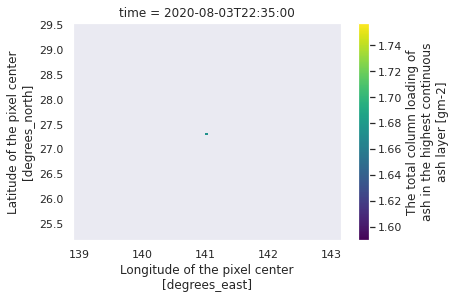

In [376]:
fid='g003'
d1 = datetime.datetime(2020,7,20,0,0)
d2 = datetime.datetime(2020,8,6,20,0)
#for fid in fidlist:
pdas3 = volcat.get_volcat_list(tdir,daterange=[d1,d2],vid=vidA,fid=fid,correct_parallax=False,mask_and_scale=False,verbose=True)
df3    = volcat.get_volcat_name_df(tdir,daterange=None,vid=None,fid=fid)
print(len(df3))
test3  = xr.open_dataset(tdir + df3.filename.values[0])
test3.isel(time=0).ash_mass_loading.plot.pcolormesh(x='longitude',y='latitude')
print(test3.ash_mass_loading_total_mass)
print(test3.feature_area)

1
<xarray.DataArray 'ash_mass_loading_total_mass' (time: 1)>
array([0.000378], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-08-03T22:35:00
Attributes:
    long_name:  The total mass of volcanic ash in the feature
    units:      Tg
<xarray.DataArray 'feature_area' (time: 1)>
array([54.22532], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-08-03T22:35:00
Attributes:
    long_name:  The total area of the detected volcanic feature
    units:      km2


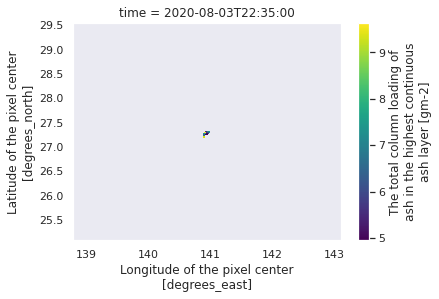

In [377]:
fid='g004'
d1 = datetime.datetime(2020,7,20,0,0)
d2 = datetime.datetime(2020,8,6,20,0)
#for fid in fidlist:
pdas4 = volcat.get_volcat_list(tdir,daterange=[d1,d2],vid=vidA,fid=fid,correct_parallax=False,mask_and_scale=False,verbose=True)
df4    = volcat.get_volcat_name_df(tdir,daterange=None,vid=None,fid=fid)
print(len(df4))
test4  = xr.open_dataset(tdir + df4.filename.values[0])
test4.isel(time=0).ash_mass_loading.plot.pcolormesh(x='longitude',y='latitude')
print(test4.ash_mass_loading_total_mass)
print(test4.feature_area)

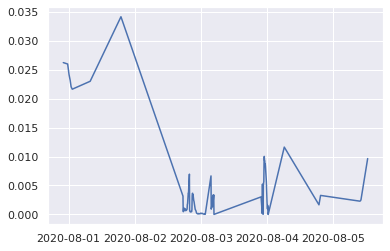

In [239]:
len(pdas)
time1 = [x.time.values for x in pdas]
mass1 = [x.ash_mass_loading_total_mass.values[0] for x in pdas]
plt.plot(time2,mass2)

Four Features 

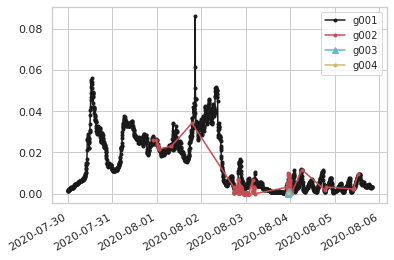

In [399]:
len(pdas)
sns.set_style('whitegrid')
#sns.set()
fig = plt.figure(1)
time2 = [x.time.values for x in pdas2]
mass2 = [x.ash_mass_loading_total_mass.values[0] for x in pdas2]
#print(mass)
plt.plot(time1,mass1,'-k.',label='g001')
plt.plot(time2,mass2,'-r.',label='g002')
time = [x.time.values for x in pdas3]
mass = [x.ash_mass_loading_total_mass.values[0] for x in pdas3]
#print(mass)
plt.plot(time,mass,'-c^',label='g003')
time = [x.time.values for x in pdas4]
mass = [x.ash_mass_loading_total_mass.values[0] for x in pdas4]
#print(time)
#print(mass)
plt.plot(time,mass,'-y.',label='g004')
fig.autofmt_xdate()
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,labels,loc='best',prop={'size':10})
plt.savefig('Nishi_total_mass_loading_fids.png')
plt.show()
#fig2 = plt.figure()
#ax1 = fig2.add_subplot(1,1,1)
#ax1.legend(handles,labels,loc='center',frameon=False)
#ax1.axis('off')
#plt.show()

In [307]:
overlap = [x for x in time1 if x in time2]
no_overlap = [x for x in time2 if x not in time1]
tii = 110
print(overlap[tii])
print(len(overlap))
jjj = time1.index(overlap[tii])
iii = time2.index(overlap[tii])
print(no_overlap)

['2020-08-03T04:40:00.000000000']
146
[array(['2020-07-31T22:05:00.000000000'], dtype='datetime64[ns]'), array(['2020-07-31T23:40:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-01T00:10:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-01T00:35:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-01T00:55:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-01T01:15:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-01T01:20:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-01T07:50:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-01T19:00:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-03T21:50:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-04T06:15:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-04T18:50:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-04T19:25:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-05T09:40:00.000000000'], dtype='datetime64[ns]'), array(['2020-08-05T09:55:00.000000000

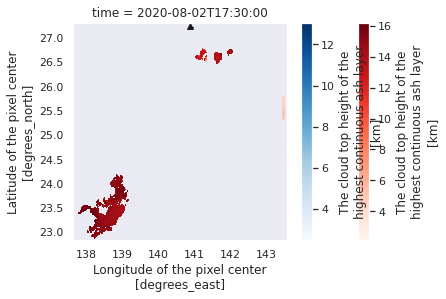

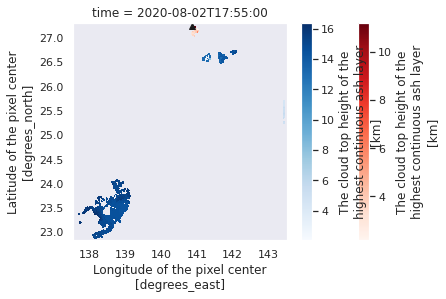

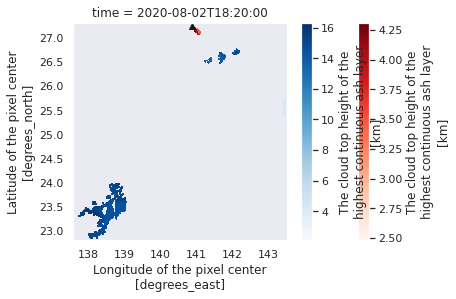

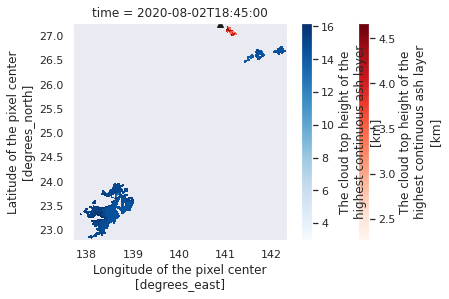

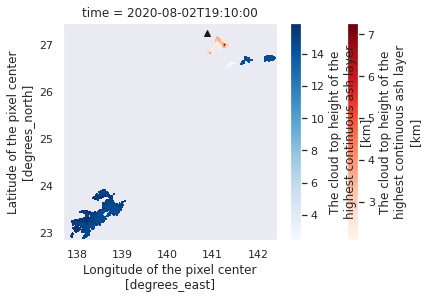

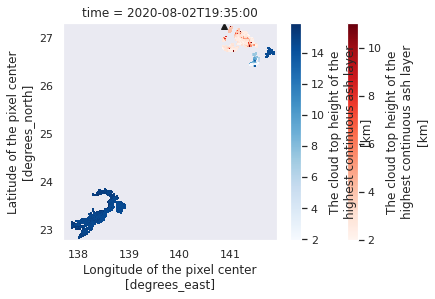

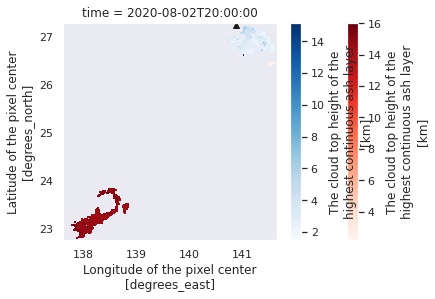

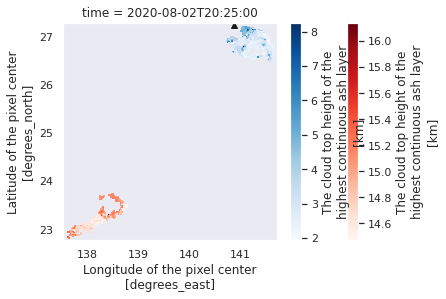

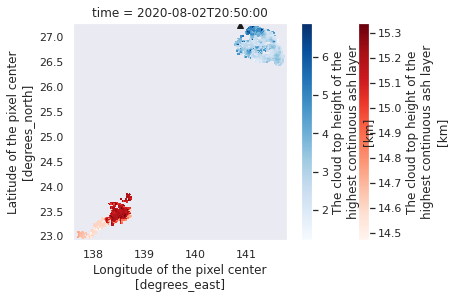

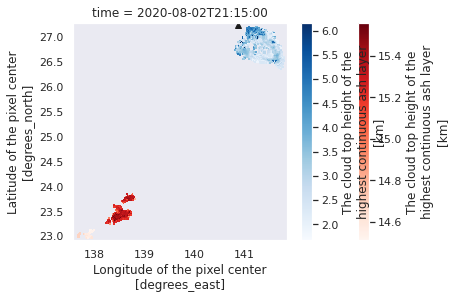

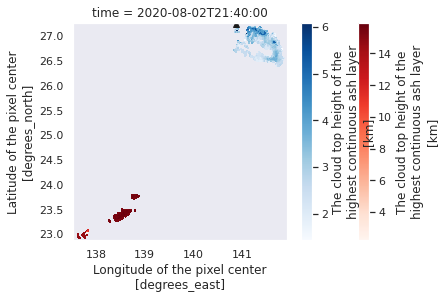

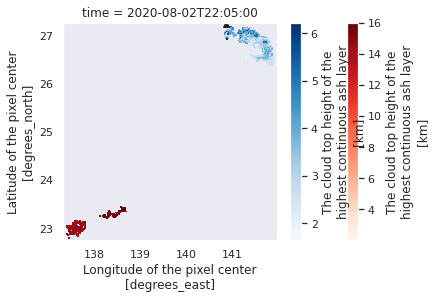

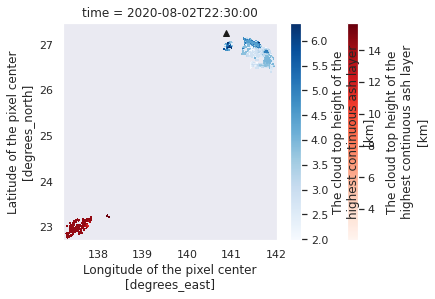

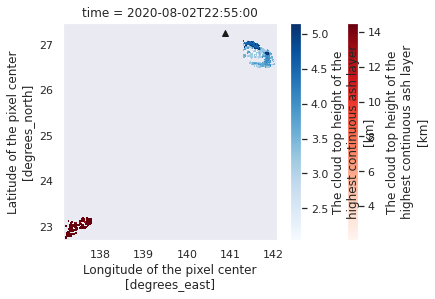

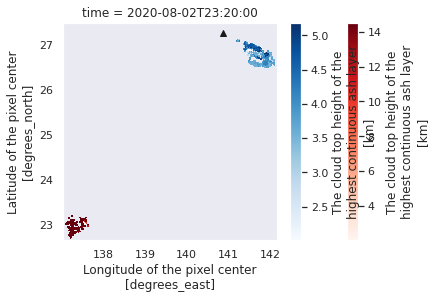

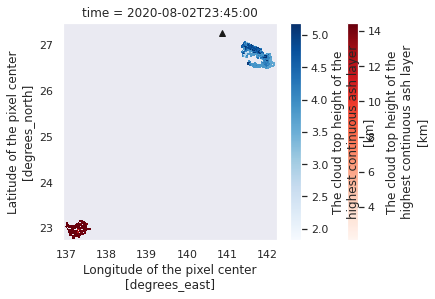

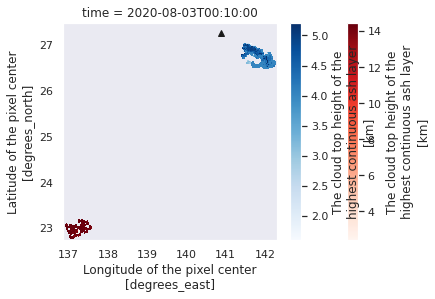

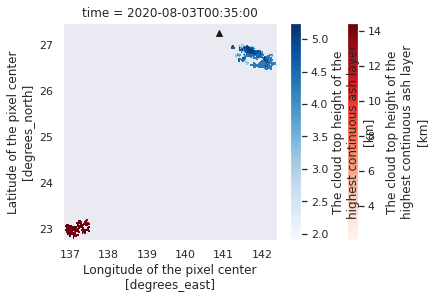

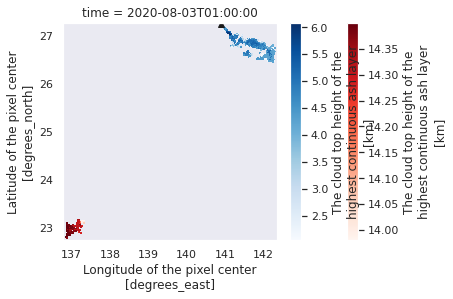

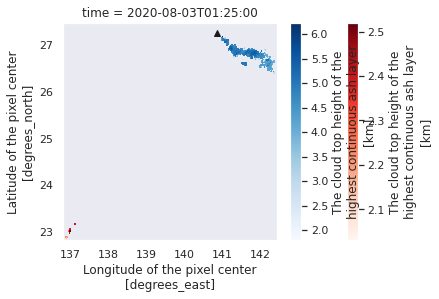

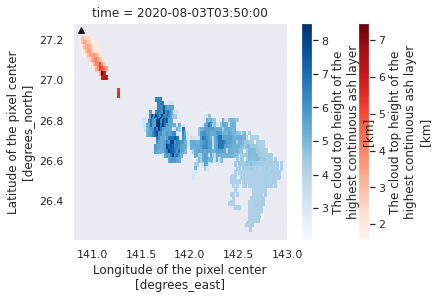

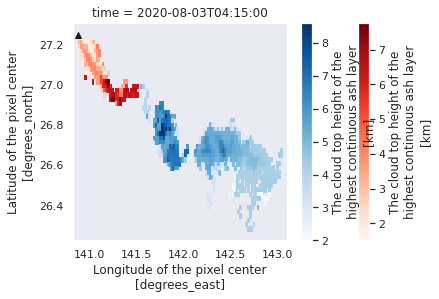

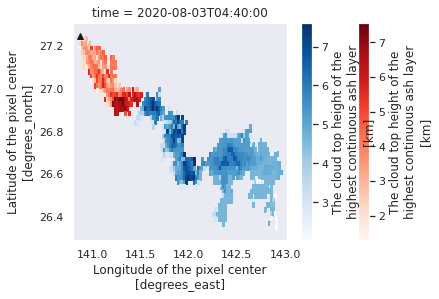

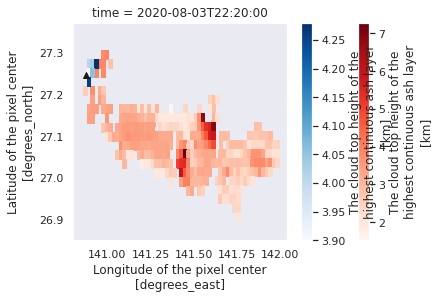

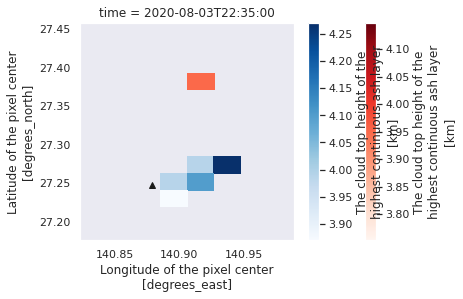

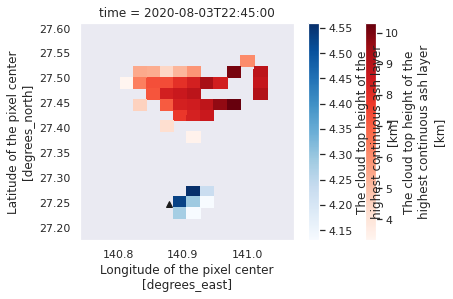

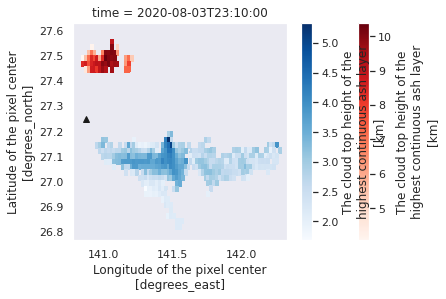

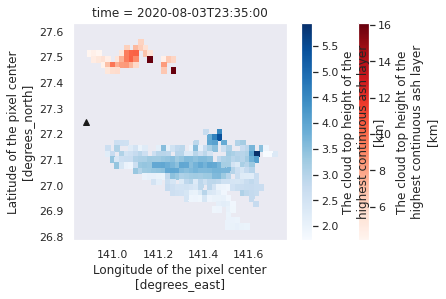

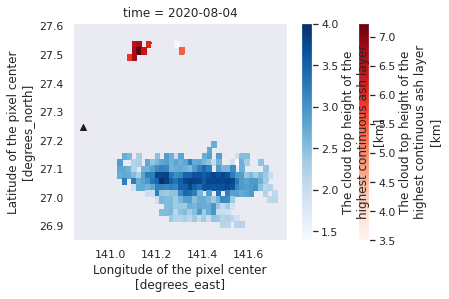

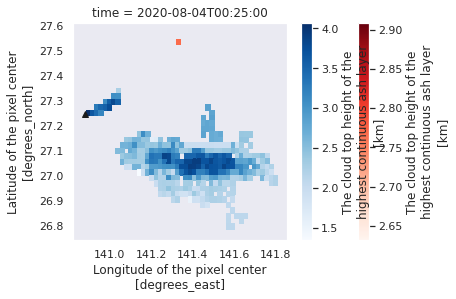

In [303]:
# plot ash mass loading for overlapping points
for tii in np.arange(0,150,5):
    jjj = time1.index(overlap[tii])
    iii = time2.index(overlap[tii])
    vht  = volcat.get_height(pdas2[iii],clip=True)
    sns.set()
    vht.isel(time=0).plot.pcolormesh(x='longitude',y='latitude',cmap='Reds',shading='nearest')
#plt.plot(vloc[0],vloc[1],'m^')
    vht  = volcat.get_height(pdas[jjj],clip=True)
    vht.isel(time=0).plot.pcolormesh(x='longitude',y='latitude',cmap='Blues',shading='nearest')
    plt.plot(140.879,27.247,'k^')
    plt.show()
#plt.savefig('nishi_volcat_2040_ht.png')
#print(np.max(vht))
#plt.show()
#vht  = volcat.get_mass(pdas2[iii],clip=True)
#sns.set()
#vht.isel(time=0).plot.pcolormesh(x='longitude',y='latitude',cmap='Reds',shading='nearest')
#plt.plot(vloc[0],vloc[1],'m^')
#plt.savefig('nishi_volcat_2040_ht.png')
#print(np.max(vht))
#plt.show()

In [344]:
def find_nearest(timelist, d1):
    try: 
        iii = timelist.index(d1)
    except:
        for iii, val in enumerate(timelist):
            #print(iii, val, type(d1), type(val[0]))
            if d1 < pd.to_datetime(val[0]): return iii

<xarray.DataArray 'ash_cloud_height' ()>
array(13.30999947)


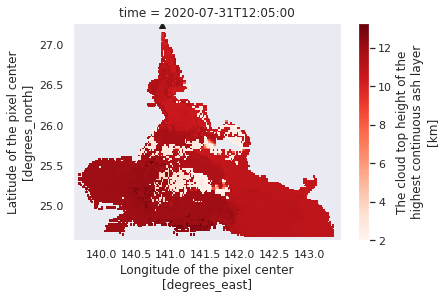

<xarray.DataArray 'ash_mass_loading' ()>
array(6.51915407)


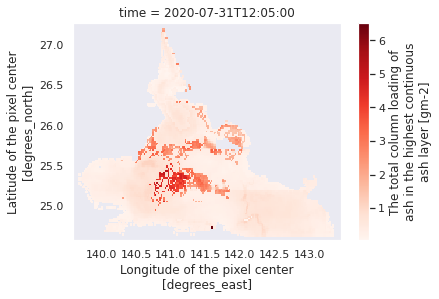

In [345]:
# plot ash mass loading and ash height.
#print(time1)
d1 = datetime.datetime(2020,7,31,12)
iii=find_nearest(time1,d1)
vht  = volcat.get_height(pdas[iii],clip=True)
sns.set()
vht.isel(time=0).plot.pcolormesh(x='longitude',y='latitude',cmap='Reds',shading='nearest')
#plt.plot(vloc[0],vloc[1],'m^')
plt.savefig('nishi_volcat_2040_ht.png')
print(np.max(vht))
plt.plot(140.879,27.247,'k^')
plt.show()
vht  = volcat.get_mass(pdas[iii],clip=True)
sns.set()
vht.isel(time=0).plot.pcolormesh(x='longitude',y='latitude',cmap='Reds',shading='nearest')
#plt.plot(vloc[0],vloc[1],'m^')
plt.savefig('nishi_volcat_2040_ht.png')
print(np.max(vht))
plt.show()

HT 4 km : MER 2.25e+02 kg/s
HT 5 km : MER 3.18e+03 kg/s
HT 6 km : MER 1.58e+04 kg/s
HT 7 km : MER 5.02e+04 kg/s
HT 8 km : MER 1.24e+05 kg/s
HT 9 km : MER 2.59e+05 kg/s
HT 10 km : MER 4.85e+05 kg/s
HT 11 km : MER 8.37e+05 kg/s
HT 12 km : MER 1.36e+06 kg/s
HT 13 km : MER 2.09e+06 kg/s
HT 14 km : MER 3.09e+06 kg/s
HT 15 km : MER 4.41e+06 kg/s
HT 16 km : MER 6.13e+06 kg/s


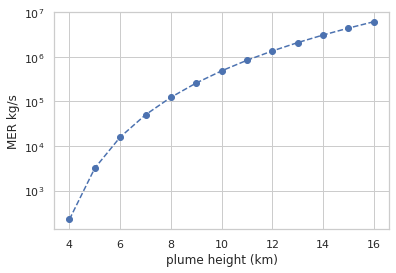

In [13]:
# how various plume heights correspond to MER according to Mastin equation.
sns.set()
sns.set_style('whitegrid')
vent = 2.88 #km  (9,455 ft)
htlist = [4,5,6,7,8,9,10,11,12,13,14,15,16]
merlist = []
for ht in htlist:
    ht2 = ht - vent
    MER = volcMER.mastinMER(ht2)
    print('HT {} km : MER {:0.2e} kg/s'.format(ht, MER))
    merlist.append(MER)
    
plt.plot(htlist, merlist, '--bo')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xlabel('plume height (km)')
ax.set_ylabel('MER kg/s')
plt.savefig('Mastin_mer_bezy.png')

In [230]:
%autoreload
from utilvolc import volcat_plots as vp
volcplot = vp.VolcatPlots(pdas)
volcplot.make_arrays()



here
['2020-08-05T20:00:00.000000000']
['2020-07-30T00:00:00.000000000']


/hysplit-users/alicec/utilhysplit/utilvolc/volcat_plots.py:76: RuntimeWarning: divide by zero encountered in double_scalars
  mer.append((masstg - massprev)*1e9/(dt.seconds))
/hysplit-users/alicec/utilhysplit/utilvolc/volcat_plots.py:76: RuntimeWarning: divide by zero encountered in double_scalars
  mer.append((masstg - massprev)*1e9/(dt.seconds))
/hysplit-users/alicec/utilhysplit/utilvolc/volcat_plots.py:76: RuntimeWarning: divide by zero encountered in double_scalars
  mer.append((masstg - massprev)*1e9/(dt.seconds))
/hysplit-users/alicec/utilhysplit/utilvolc/volcat_plots.py:76: RuntimeWarning: divide by zero encountered in double_scalars
  mer.append((masstg - massprev)*1e9/(dt.seconds))
/hysplit-users/alicec/utilhysplit/utilvolc/volcat_plots.py:76: RuntimeWarning: divide by zero encountered in double_scalars
  mer.append((masstg - massprev)*1e9/(dt.seconds))
/hysplit-users/alicec/utilhysplit/utilvolc/volcat_plots.py:76: RuntimeWarning: divide by zero encountered in double_scalars
 

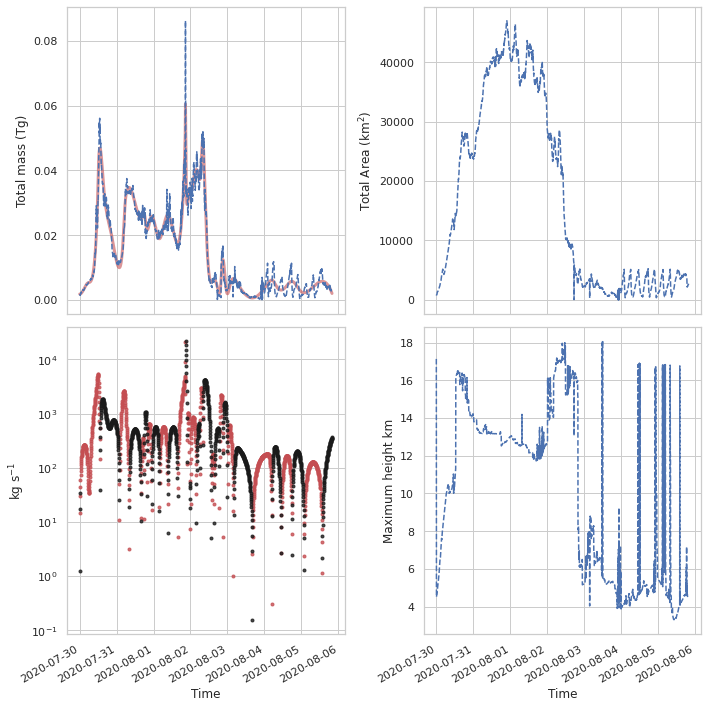

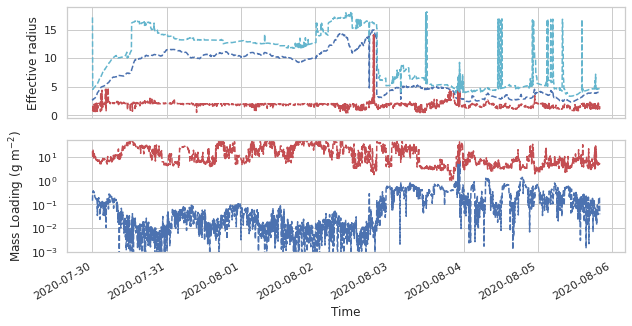

In [353]:
%autoreload
volcplot.set_plot_settings()
#volcplot.set_plot_settings()
fig1 = volcplot.plot_multiA(fignum=1)
fig2 = volcplot.plot_multiB(fignum=2)
fig1.savefig('Nishi_volcat_plotA.png')
fig2.savefig('Nishi_volcat_plotB.png')

(-4000.0, 10000.0)

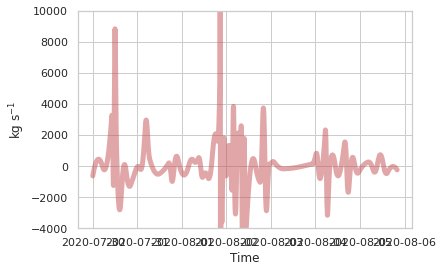

In [347]:
sns.set_style('whitegrid')
fit = plt.figure(1)
ax = fit.add_subplot(1,1,1)
volcplot.sub_plot_mer(ax)
ax.set_ylim(-4000,10000)